In [7]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [32]:
# FILES = glob.glob('../../results/search/human_UP000005640_sp/*/FDR_fdrbench.txt')
file_ = "../../results/search/human_UP000005640_sp/b1906_293T_proteinID_01A_QE3_122212/FDR_fdrbench.txt"

In [33]:
df_list = list()

# # Extract data from FILES
# for file_ in FILES:
#     with open(file_, 'r') as f:
#         data = pd.read_csv(f)
#         df_list.append(data[['q_value', 'combined_fdp', 'lower_bound_fdp', 'paired_fdp']])

with open(file_, 'r') as f:
        data = pd.read_csv(f)
        df_list.append(data[['q_value', 'combined_fdp', 'lower_bound_fdp', 'paired_fdp']])

# Combine data and sort it by q-value
master_df = pd.concat(df_list, ignore_index=True)
master_df.sort_values(by='q_value', inplace=True)
master_df.reset_index(inplace=True)

# Stats at 1% FDR
idx = master_df.index[master_df['q_value'] < 0.01]
stats = {
        "Total discoveries": idx.shape[0],
        "Combined method": f"{master_df.combined_fdp[idx[-1]] * 100:.2f}%",
        "Lower bound" : f"{master_df.lower_bound_fdp[idx[-1]] * 100:.2f}%",
        "Paired method": f"{master_df.paired_fdp[idx[-1]] * 100:.2f}%"
}


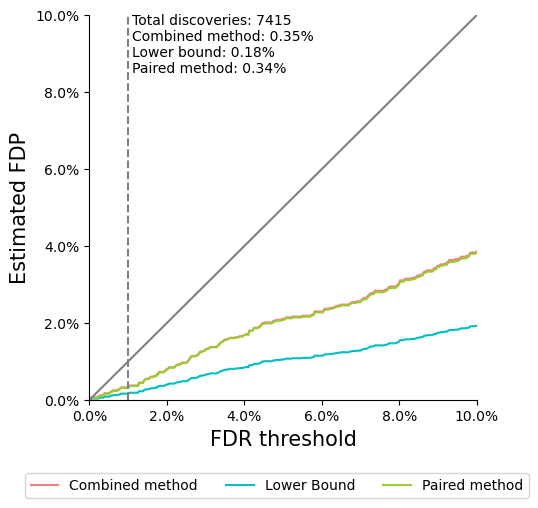

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Plot results
ax.plot(master_df.q_value*100, master_df.combined_fdp*100, color='lightcoral', label='Combined method')
ax.plot(master_df.q_value*100, master_df.lower_bound_fdp*100, color='c', label='Lower Bound')
ax.plot(master_df.q_value*100, master_df.paired_fdp*100, color='yellowgreen', label='Paired method')
ax.set_ylim(0, 10)
ax.set_xlim(0, 10)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('FDR threshold', fontsize=15)
ax.set_ylabel('Estimated FDP', fontsize=15)

ax.axline((0, 0), slope=1, color='grey')
ax.axline((1, 0), (1, ax.get_ylim()[1]), color='grey', linestyle='--')

# Add stats to figure
txt = '\n'.join([f"{k}: {v}"
                 for k, v in stats.items()])
ax.text(1.1, 8.5, txt)
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3)